# 기업 연걸 



plotly 대체해서 보고 할 용도 
https://hamait.tistory.com/842

In [33]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [77]:
path = "/home/users/JunhaPark/crunchbase/crunchbase_data_files/bulk_export/"
os.listdir(path)

['events.csv',
 'event_appearances.csv',
 'organization_descriptions.csv',
 'people_descriptions.csv',
 'ipos.csv',
 'investment_partners.csv',
 'degrees.csv',
 'people.csv',
 'funds.csv',
 'acquisitions.csv',
 'investors.csv',
 'investments.csv',
 'funding_rounds.csv',
 'organizations.csv',
 'org_parents.csv',
 'jobs.csv',
 'category_groups.csv']

In [78]:
path+'organization.csv'

'/home/users/JunhaPark/crunchbase/crunchbase_data_files/bulk_export/organization.csv'

In [79]:
org_df =pd.read_csv(path+'organizations.csv')

In [80]:
org_eda_df =org_df[["uuid","name",'num_exits',"type","roles","domain","homepage_url","country_code","state_code","region","city","category_list","num_funding_rounds","total_funding_usd","founded_on","last_funding_on","closed_on","employee_count","primary_role"]]

In [81]:
#org_eda_df.sort_values(by='founded_on')
org_eda_df['founded_on'].value_counts().sort_index()

1000-01-01     4
1000-12-01     1
1001-01-01     1
1007-01-01     1
1011-01-01     1
              ..
2023-02-27     7
2023-02-28     2
2023-03-01    13
2023-03-02     5
2023-03-04     1
Name: founded_on, Length: 27156, dtype: int64

In [82]:
org_df['founded_on']

0          2005-06-01
1          1996-03-17
2          2004-10-11
3          2004-01-01
4          2004-02-04
              ...    
2650083           NaN
2650084    1988-01-01
2650085           NaN
2650086    2018-02-02
2650087    2022-01-01
Name: founded_on, Length: 2650088, dtype: object

In [83]:
org_df['founded_on_datetime'] = pd.to_datetime(org_df['founded_on'],errors='coerce')

In [84]:
org_df['founded_on_datetime']

0         2005-06-01
1         1996-03-17
2         2004-10-11
3         2004-01-01
4         2004-02-04
             ...    
2650083          NaT
2650084   1988-01-01
2650085          NaT
2650086   2018-02-02
2650087   2022-01-01
Name: founded_on_datetime, Length: 2650088, dtype: datetime64[ns]

In [86]:
#meta 
org_df[org_df['uuid']== "df662812-7f97-0b43-9d3e-12f64f504fbb"]

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,founded_on_datetime
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,14.0,2007-05-26 04:22:15,2022-08-05 13:19:05,"Meta Platforms, Inc.","investor,company",...,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...,Facebook,"Facebook, Inc.",NaN,company,1.0,2004-02-04


In [58]:
org_df['founded_on_datetime'].dt.year.isnull().sum(
)

611162

In [87]:
org_parents_df = pd.read_csv(path+'/org_parents.csv')
df  = org_parents_df[['name','parent_name','parent_uuid']]
df

,name,parent_name,parent_uuid
0,Fox Interactive Media,21st Century Fox,ddfe6b91-4541-7f5c-7d6a-724f75c98088
1,Hutchison Whampoa,Cheung Kong Holdings,5858c937-702e-c278-1725-2b5e02471482
2,CBS Entertainment,CBS Corporation,cd19ea0d-745c-e3b6-d819-30b91caf8ebb
3,Plaxo,Comcast,fbc7746d-86e0-8fd6-19d8-69280c686d02
4,AddThis,Oracle,bef5bd4b-72c6-7877-d7ab-8bbe43f7bda7
...,...,...,...
24084,WXC Technology,Digital Xperience Holdings,1296a3b4-c324-4c38-b97c-a01e23458e88
24085,AEROCONE GLOBAL CONSULTING LIMITED,AEROCONE TRAVELS CANADA INC,01e8527d-db81-4adc-91fd-9fe68469cccf
24086,AEROCONE TRAVELS AND COMPANIES UK LIMITED,AEROCONE TRAVELS AND COMPANIES UK LIMITED,9a50e760-d279-4526-aa90-235ee498d997
24087,AEROCONE TRAVELS AND COMPANIES UK LIMITED,AEROCONE TRAVELS CANADA INC,01e8527d-db81-4adc-91fd-9fe68469cccf


In [89]:
org_parents_df

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,192631.0,2007-06-01 04:46:57,2022-07-19 01:26:51,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox
1,3d9e4070-1a25-7491-d1a9-17bec9f6361b,Hutchison Whampoa,organization,hutchison-whampoa-limited,https://www.crunchbase.com/organization/hutchi...,246319.0,2007-06-09 14:20:16,2023-01-05 11:29:37,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings
2,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,171490.0,2007-06-09 14:30:10,2022-10-10 04:29:11,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation
3,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,125336.0,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast
4,fc89cfde-a28e-e12c-443c-edccb6c93fd4,AddThis,organization,addthis,https://www.crunchbase.com/organization/addthis,158803.0,2007-06-13 16:00:07,2019-06-24 21:45:36,bef5bd4b-72c6-7877-d7ab-8bbe43f7bda7,Oracle
...,...,...,...,...,...,...,...,...,...,...
24084,a9ebd741-b0f3-493a-bc45-7cf848d47776,WXC Technology,organization,wxc-tech,https://www.crunchbase.com/organization/wxc-tech,2379055.0,2023-03-04 05:32:36,2023-03-05 06:28:25,1296a3b4-c324-4c38-b97c-a01e23458e88,Digital Xperience Holdings
24085,64b96faf-f2e6-4443-90cd-84638064d303,AEROCONE GLOBAL CONSULTING LIMITED,organization,aerocone-global-consulting-limited,https://www.crunchbase.com/organization/aeroco...,NaN,2023-03-05 15:02:55,2023-03-05 15:02:55,01e8527d-db81-4adc-91fd-9fe68469cccf,AEROCONE TRAVELS CANADA INC
24086,de15f841-7ac8-4405-8a49-3dce252aaed2,AEROCONE TRAVELS AND COMPANIES UK LIMITED,organization,aerocone-travels-and-companies-uk-limited-aed2,https://www.crunchbase.com/organization/aeroco...,NaN,2023-03-05 15:17:49,2023-03-05 15:17:49,9a50e760-d279-4526-aa90-235ee498d997,AEROCONE TRAVELS AND COMPANIES UK LIMITED
24087,9a50e760-d279-4526-aa90-235ee498d997,AEROCONE TRAVELS AND COMPANIES UK LIMITED,organization,aerocone-travels-and-companies-uk-limited-d997,https://www.crunchbase.com/organization/aeroco...,NaN,2023-03-05 15:17:49,2023-03-05 15:17:49,01e8527d-db81-4adc-91fd-9fe68469cccf,AEROCONE TRAVELS CANADA INC


In [76]:
#meta example
df[df['parent_uuid'] == "df662812-7f97-0b43-9d3e-12f64f504fbb"]

,name,parent_name,parent_uuid
839,Instagram,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
2345,Oculus,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
3772,Wit.ai,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
5777,Messenger,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
17380,Novi,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
18963,Facebook Careers,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb
23305,Meta - Reality Labs,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb


sleeping beauty 적용할때 
공개시장만 가능 기존의 시장들은 불가능함. 

투자를 받은 날짜와 시리즈를 명명하는것은 가능하나 그떄의 금액으로 처리하는것도 가능하나 . 
yearly citation으로 처리하기는 무리가 있음 



[보편적인 탄력성에 대한 이해 ](https://www.nature.com/articles/nature16948) 논문 참고중 


[python portfolio optimization](https://python.plainenglish.io/using-python-for-financial-portfolio-optimization-e27f059e3fb8) 확인

[Us goverenment report](https://www.sec.gov/edgar/sec-api-documentation)를 보고 API를 받아다가 이후를 작성해도 될 것 같음 

https://towardsdatascience.com/journey-to-tempered-stable-distribution-part-1-fat-tailed-distribution-958d28bc20c

부족한 글자 공부 
https://datascienceschool.net/02%20mathematics/01.01%20그리스%20문자.html


In [106]:
funding_rounds_df =pd.read_csv(path+'funding_rounds.csv')


In [98]:
funding_rounds_eda_df = funding_rounds_df[['name','country_code', 'state_code', 'region', 'city',
                   'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount','raised_amount_currency_code',
                   'post_money_valuation_usd','post_money_valuation', 'post_money_valuation_currency_code',
                   'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids']]

In [107]:
meta_funding_rounds_df = funding_rounds_df[funding_rounds_df['org_uuid'] == "df662812-7f97-0b43-9d3e-12f64f504fbb"]

In [127]:
meta_funding_rounds_df['announced_on']=pd.to_datetime(meta_funding_rounds_df['announced_on'])

/tmp/ipykernel_2244040/3986204733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_funding_rounds_df['announced_on']=pd.to_datetime(meta_funding_rounds_df['announced_on'])


In [130]:
meta_funding_rounds_df.set_index('announced_on')

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
announced_on,,,,,,,,,,,,,,,,,,,,,
2004-09-01,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,417857.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,5.000000e+05,5.000000e+05,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
2005-05-01,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,525846.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,1.270000e+07,1.270000e+07,USD,9.800000e+07,9.800000e+07,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2006-04-01,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,400570.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,2.750000e+07,2.750000e+07,USD,5.025000e+08,5.025000e+08,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
2007-10-24,c26d2da6-9801-e163-2ded-617dcd0a9a65,Series C - Meta,funding_round,facebook-series-c--c26d2da6,https://www.crunchbase.com/funding_round/faceb...,510587.0,2007-10-24 16:57:56,2018-02-12 23:56:04,USA,CA,...,2.400000e+08,2.400000e+08,USD,1.500000e+10,1.500000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,fd80725f-53fc-7009-9878-aeecf1e9ffbb
2007-11-30,0f0d6b3a-2bc5-28b8-7303-381e373a9751,Series C - Meta,funding_round,facebook-series-c--0f0d6b3a,https://www.crunchbase.com/funding_round/faceb...,481935.0,2008-03-27 22:23:40,2018-02-12 23:44:33,USA,CA,...,6.000000e+07,6.000000e+07,USD,NaN,NaN,NaN,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,87e297f8-53fd-a340-cbfc-6f34d3c62a86
2008-01-15,85246d86-383d-5f3c-0611-8f0a092cdc28,Series C - Meta,funding_round,facebook-series-c--85246d86,https://www.crunchbase.com/funding_round/faceb...,225005.0,2008-05-07 19:45:59,2018-02-12 23:30:41,USA,CA,...,1.500000e+07,1.500000e+07,USD,NaN,NaN,NaN,3.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,aefa3a84-5193-00c3-5cbf-ec5ec2645672
2008-05-01,4e8faa5e-0b4f-03da-75f5-654ce3bed6bc,Debt Financing - Meta,funding_round,facebook-debt-financing--4e8faa5e,https://www.crunchbase.com/funding_round/faceb...,179225.0,2008-05-10 15:13:05,2018-02-12 22:15:00,USA,CA,...,1.000000e+08,1.000000e+08,USD,NaN,NaN,NaN,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,02f87511-2b76-0f3d-7fed-109aba6dd5a5
2008-03-27,7ac749d3-11a7-8706-1484-9c9ea8e3593f,Series C - Meta,funding_round,facebook-series-c--7ac749d3,https://www.crunchbase.com/funding_round/faceb...,527578.0,2009-01-14 21:08:39,2018-02-12 23:52:49,USA,CA,...,6.000000e+07,6.000000e+07,USD,1.482000e+10,1.482000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,87e297f8-53fd-a340-cbfc-6f34d3c62a86
2009-05-26,b0e3eb99-9048-d301-0892-26cedab900a7,Series D - Meta,funding_round,facebook-series-d--b0e3eb99,https://www.crunchbase.com/funding_round/faceb...,523983.0,2009-05-26 16:57:01,2019-10-29 22:44:47,USA,CA,...,2.000000e+08,2.000000e+08,USD,1.000000e+10,1.000000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,9bc45524-5c04-54c1-ec99-5afb33cd3fc4


In [93]:
acquisitions_df = pd.read_csv(path+'acquisitions.csv')

In [97]:
meta_acquisitions_df = acquisitions_df[acquisitions_df['acquirer_uuid'] == "df662812-7f97-0b43-9d3e-12f64f504fbb"]

In [131]:
meta_acquisitions_df['acquired_on']=pd.to_datetime(meta_acquisitions_df['acquired_on'])

/tmp/ipykernel_2244040/1484948128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_acquisitions_df['acquired_on']=pd.to_datetime(meta_acquisitions_df['acquired_on'])


In [132]:
meta_acquisitions_df.set_index('acquired_on')

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_name,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,price_usd,price,price_currency_code
acquired_on,,,,,,,,,,,,,,,,,,,,,
2007-07-01,2380a2ed-c0ea-26f4-3f93-764321069ce8,Parakey acquired by Meta,acquisition,facebook-acquires-parakey--2380a2ed,https://www.crunchbase.com/acquisition/faceboo...,125960.0,2007-07-26 07:36:07,2018-02-12 23:37:26,1843ad58-96d5-b890-705b-4737ac48c6a0,Parakey,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,NaN,NaN,NaN,NaN
2009-08-10,00488f73-33d4-f6ff-4e96-c7f5a505e7a7,FriendFeed acquired by Meta,acquisition,facebook-acquires-friendfeed--00488f73,https://www.crunchbase.com/acquisition/faceboo...,137754.0,2009-08-10 19:05:04,2018-02-12 23:36:05,f2124486-1b64-ae29-4156-cb612ca1d177,FriendFeed,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,NaN,50000000.0,50000000.0,USD
2010-02-19,d52ac44d-83af-f0c1-5973-486132abbb43,Octazen Solutions acquired by Meta,acquisition,facebook-acquires-octazen--d52ac44d,https://www.crunchbase.com/acquisition/faceboo...,97694.0,2010-02-20 04:14:45,2018-02-12 23:54:34,56e9acb0-8c32-f6ee-49e1-8dc17607ee0f,Octazen Solutions,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,NaN,NaN,NaN,NaN
2010-04-02,6af410c1-ebfd-f1f9-80a8-3cd2ceea44c4,Divvyshot acquired by Meta,acquisition,facebook-acquires-divvyshot--6af410c1,https://www.crunchbase.com/acquisition/faceboo...,38072.0,2010-04-02 23:02:41,2018-02-12 23:35:22,9c4f3671-2899-12d5-a4a0-6455155411a4,Divvyshot,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,NaN,NaN,NaN,NaN
2010-05-26,34c970af-6d70-6e9a-9705-4e11c7ecd849,ShareGrove acquired by Meta,acquisition,facebook-acquires-sharegrove--34c970af,https://www.crunchbase.com/acquisition/faceboo...,53051.0,2010-05-26 20:15:37,2018-02-12 23:36:25,fe167fec-385f-c4ea-f3f3-6071c9ab1306,ShareGrove,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,be532cc9-02ef-4ade-8cde-1eb945abbec5,Camouflaj acquired by Meta,acquisition,facebook-acquires-camouflaj--be532cc9,https://www.crunchbase.com/acquisition/faceboo...,5870.0,2022-10-12 09:44:30,2022-10-12 09:44:30,ce9d79db-c9d6-4c61-9ca9-3011cb04fe3e,Camouflaj,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,acquisition,NaN,NaN,NaN
2022-10-11,e7a1fc45-242d-41ff-9e30-4b79bd16081d,Armature Studio acquired by Meta,acquisition,facebook-acquires-armature-studio--e7a1fc45,https://www.crunchbase.com/acquisition/faceboo...,5872.0,2022-10-12 09:47:54,2022-10-12 09:47:54,8dc66e5c-9db2-422c-94e2-81573cc16d2d,Armature Studio,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,acquisition,NaN,NaN,NaN
2022-10-11,ad7b0a4f-3e65-4f64-a7dd-009a2b0c6629,Twisted Pixel Games acquired by Meta,acquisition,facebook-acquires-twisted-pixel-games--ad7b0a4f,https://www.crunchbase.com/acquisition/faceboo...,5879.0,2022-10-12 09:50:55,2022-10-12 09:50:55,338e42fc-c5f4-9243-b5ca-c0c29439ecf1,Twisted Pixel Games,...,Meta,https://www.crunchbase.com/organization/facebook,USA,CA,California,Menlo Park,acquisition,NaN,NaN,NaN


In [109]:
investments_df = pd.read_csv(path+'investments.csv')
investors_df = pd.read_csv(path+'investors.csv')
investments_partners_df = pd.read_csv(path+'investment_partners.csv')

In [111]:
investments_partners_df

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer
1,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy
2,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Meta,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,478e7efd-bec4-b9f5-304b-cffedc1fc012,David Sze
3,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,0f9f3c05-cb79-f58f-6cc5-98ddc8382d4f,Paul Madera
4,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,ea9f4980-600c-84f4-a5d6-b4f8c2f787fb,Gus Tai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190092,0c533dbe-9687-4bb1-9a4d-f7ac17b08987,Firestreak Ventures investment in Seed Round -...,investment,firestreak-ventures-invested-in-perfect-f8b5-s...,https://www.crunchbase.com/investment/firestre...,NaN,2023-03-04 23:21:59,2023-03-04 23:21:59,73e731db-ee3d-44ed-a5c8-746ada9bfa39,Seed Round - Perfect,5e7c109d-9173-4555-a3fa-a13053b05e44,Firestreak Ventures,d92cfe98-f7e6-498c-b867-d4ebbb4d95ed,Amir Rustamzadeh
190093,2e22474e-5394-4577-b40b-df74bb93495f,Axel Springer Plug and Play Accelerator invest...,investment,axel-springer-plug-and-play-accelerator-invest...,https://www.crunchbase.com/investment/axel-spr...,NaN,2023-03-05 17:51:53,2023-03-05 17:51:53,fee93e49-a704-e80b-3a54-ada287766940,Seed Round - Zizoo,bbdd8248-e677-38af-784a-0cea23ef8586,Axel Springer Plug and Play Accelerator,a0510be3-9f82-f52e-baf3-6b14e0442e79,Robin Haak
190094,f0857030-68ce-4021-b0ac-2eaccb54f85d,7percent Ventures investment in Seed Round - A...,investment,7-percent-invested-in-aerovolt-seed--3aa34b52-...,https://www.crunchbase.com/investment/7-percen...,NaN,2023-03-05 23:46:10,2023-03-05 23:46:10,3aa34b52-d711-4028-a012-13da87f6b13b,Seed Round - Aerovolt,7654ff51-f435-7610-d965-19ced655b2d1,7percent Ventures,a4ed4ab3-74ed-1967-811e-d587070d2b8d,Andrew Scott
190095,1ddec9e9-da9b-4a72-865a-2ceb29dda7a7,7percent Ventures investment in Seed Round - U...,investment,7-percent-invested-in-untap-water-seed--bf147d...,https://www.crunchbase.com/investment/7-percen...,NaN,2023-03-05 23:51:44,2023-03-05 23:51:44,bf147d04-97bb-400e-9914-4767d32ad87a,Seed Round - Untap,7654ff51-f435-7610-d965-19ced655b2d1,7percent Ventures,a4ed4ab3-74ed-1967-811e-d587070d2b8d,Andrew Scott


In [112]:
investments_partners_df[investments_partners_df['funding_round_uuid'] == 'd950d7a5-79ff-fb93-ca87-13386b0e2feb']

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer
1,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy
45189,888e2169-84fe-7c22-c2c8-8d7756060a6d,Cambrian Ventures investment in Series A - Meta,investment,cambrian-ventures-invested-in-facebook-series-...,https://www.crunchbase.com/investment/cambrian...,NaN,2016-02-16 18:51:36,2018-02-13 00:54:03,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b17358c5-2334-a1fc-1024-8a741e35f8bc,Cambrian Ventures,709f22ee-9cc8-3f7e-3fe5-4e0cccead08f,Venky Harinarayan
45190,888e2169-84fe-7c22-c2c8-8d7756060a6d,Cambrian Ventures investment in Series A - Meta,investment,cambrian-ventures-invested-in-facebook-series-...,https://www.crunchbase.com/investment/cambrian...,NaN,2016-02-16 18:51:36,2018-02-13 00:54:03,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b17358c5-2334-a1fc-1024-8a741e35f8bc,Cambrian Ventures,76665c86-ec03-9414-3a52-9394e82347ee,Anand Rajaraman


In [115]:
investments_df[investments_df['funding_round_uuid']== 'd950d7a5-79ff-fb93-ca87-13386b0e2feb']

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
31434,292550e1-ceb2-f30f-2af3-1a5807d06904,Reid Hoffman investment in Series A - Meta,investment,reid-hoffman-invested-in-facebook-series-a--d9...,https://www.crunchbase.com/investment/reid-hof...,NaN,2011-01-10 07:36:33,2018-02-13 00:51:58,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,6bbee73e-72ca-be5f-9cd2-ddc54a8b237f,Reid Hoffman,person,False
31435,13c5da12-7e21-c633-d1e5-e66e0ab22337,Mark Pincus investment in Series A - Meta,investment,mark-pincus-invested-in-facebook-series-a--d95...,https://www.crunchbase.com/investment/mark-pin...,NaN,2011-01-10 07:36:33,2018-02-13 00:51:31,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,0159561f-be5d-81eb-7ccd-b4d6efeb30fc,Mark Pincus,person,False
156992,888e2169-84fe-7c22-c2c8-8d7756060a6d,Cambrian Ventures investment in Series A - Meta,investment,cambrian-ventures-invested-in-facebook-series-...,https://www.crunchbase.com/investment/cambrian...,NaN,2016-02-16 18:51:36,2018-02-13 00:54:03,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b17358c5-2334-a1fc-1024-8a741e35f8bc,Cambrian Ventures,organization,False


In [116]:
investors_df

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,430864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,investor,wetpaint-inc.com,...,2.0,NaN,NaN,NaN,NaN,NaN,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,8694.0,2007-05-26 02:30:28,2022-11-30 00:28:26,"investor,company",zoho.com,...,9.0,NaN,NaN,NaN,1996-03-17,NaN,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,58861.0,2007-05-26 03:21:34,2022-07-19 01:45:23,"investor,company",omidyar.com,...,340.0,NaN,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,14.0,2007-05-26 04:22:15,2022-08-05 13:19:05,"investor,company",meta.com,...,50.0,2.612282e+10,2.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,553314.0,2007-05-26 04:51:46,2022-07-28 08:50:59,investor,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243073,1d7cdb54-5495-4a66-82e7-2d884289ce43,NFL Investments,organization,nfl-investments,https://www.crunchbase.com/organization/nfl-in...,4288639.0,2023-03-05 06:36:41,2023-03-05 06:36:41,investor,nflinvestments.com,...,1.0,NaN,NaN,NaN,2004-01-01,NaN,https://www.facebook.com/NFLInvestments/,https://www.linkedin.com/company/nflinvestments/,https://twitter.com/NFLInvestments,https://res.cloudinary.com/crunchbase-producti...
243074,8099940d-e9ec-4a2c-98ac-48f322e35252,Apk Creaters,person,apk-creaters,https://www.crunchbase.com/person/apk-creaters,4237658.0,2023-03-05 10:03:22,2023-03-05 10:03:22,investor,apkcreaters.com,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/people/Apkcreaters-of...,https://apkcreaters.com/,https://apkcreaters.com,https://res.cloudinary.com/crunchbase-producti...
243075,36f98fc2-3cf4-4ef3-b74f-58bb8eff10b0,Sanjeev Kumar Upadhyay,person,sanjeev-kumar-upadhyay,https://www.crunchbase.com/person/sanjeev-kuma...,NaN,2023-03-05 13:12:18,2023-03-05 13:12:18,investor,abhyuday.co,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243076,ce2e23f9-2b4d-454c-8206-77ff5c8cb94f,Will Jazz,person,will-jazz,https://www.crunchbase.com/person/will-jazz,NaN,2023-03-05 15:29:32,2023-03-05 15:29:32,investor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
ipo_df = pd.read_csv(path+'ipos.csv')

In [123]:
ipo_df[ipo_df['org_uuid']== 'df662812-7f97-0b43-9d3e-12f64f504fbb']['went_public_on']

1473    2012-05-18
Name: went_public_on, dtype: object

In [122]:
ipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48724 entries, 0 to 48723
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           48724 non-null  object 
 1   name                           0 non-null      float64
 2   type                           48724 non-null  object 
 3   permalink                      48724 non-null  object 
 4   cb_url                         48724 non-null  object 
 5   rank                           48723 non-null  float64
 6   created_at                     48724 non-null  object 
 7   updated_at                     48724 non-null  object 
 8   org_uuid                       48724 non-null  object 
 9   org_name                       48724 non-null  object 
 10  org_cb_url                     48724 non-null  object 
 11  country_code                   48627 non-null  object 
 12  state_code                     13702 non-null 

# 공개시장 이후 public 데이터 에 대한 자료 


In [13]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import yfinance as yf

In [22]:
var1 = yf.Ticker('META')
meta = var1.institutional_holders
meta['comp'] = var1.ticker

In [23]:
var2 = yf.Ticker('TSLA')
TSLA =  var2.institutional_holders
TSLA['comp'] = var2.ticker

In [24]:
tog_ = pd.concat([TSLA,meta])

In [27]:
tog_

,Holder,Shares,Date Reported,% Out,Value,comp
0,Vanguard Group Inc,222486933,2023-06-29,0.0701,54511522232,TSLA
1,Blackrock Inc.,185889398,2023-06-29,0.0586,45544760382,TSLA
2,State Street Corporation,104115390,2023-06-29,0.0328,25509311131,TSLA
3,"Geode Capital Management, LLC",51656526,2023-06-29,0.0163,12656365151,TSLA
4,Capital World Investors,42272512,2023-06-29,0.0133,10357187932,TSLA
5,"FMR, LLC",28771552,2023-06-29,0.0091,7049317797,TSLA
6,Norges Bank Investment Management,28085245,2022-12-30,0.0088,6881165723,TSLA
7,Price (T.Rowe) Associates Inc,27984161,2023-06-29,0.0088,6856399132,TSLA
8,Morgan Stanley,27983350,2023-06-29,0.0088,6856200429,TSLA
9,JP Morgan Chase & Company,26739940,2023-06-29,0.0084,6551552552,TSLA


In [28]:
G = nx.from_pandas_edgelist(tog_ , 'Holder', 'comp')
G.nodes()
G.edges()

EdgeView([('Vanguard Group Inc', 'TSLA'), ('Vanguard Group Inc', 'META'), ('TSLA', 'Blackrock Inc.'), ('TSLA', 'State Street Corporation'), ('TSLA', 'Geode Capital Management, LLC'), ('TSLA', 'Capital World Investors'), ('TSLA', 'FMR, LLC'), ('TSLA', 'Norges Bank Investment Management'), ('TSLA', 'Price (T.Rowe) Associates Inc'), ('TSLA', 'Morgan Stanley'), ('TSLA', 'JP Morgan Chase & Company'), ('Blackrock Inc.', 'META'), ('State Street Corporation', 'META'), ('Geode Capital Management, LLC', 'META'), ('Capital World Investors', 'META'), ('FMR, LLC', 'META'), ('Norges Bank Investment Management', 'META'), ('Price (T.Rowe) Associates Inc', 'META'), ('JP Morgan Chase & Company', 'META'), ('META', 'Capital International Investors')])

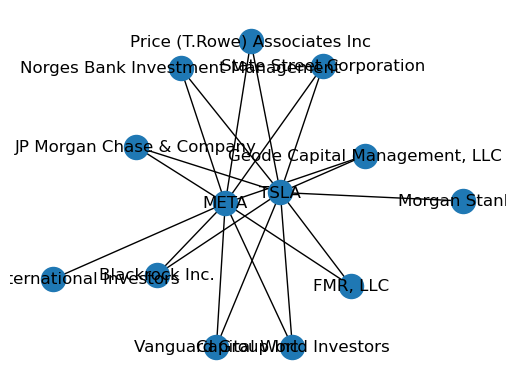

In [29]:
fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nx.draw(G, pos, ax = ax, with_labels=True)

In [30]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [31]:
tickers = tickers.Symbol.to_list()

In [32]:
tickers

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

https://www.youtube.com/watch?v=x6PNcuZk83g